In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sys.path.append('../')
from potentials import yukawa
from models import cnn, cnn_dropout
import utils
from utils import mean_absolute_percentage_error
import random
random.seed(123)
np.random.seed(123)

import tensorflow
tensorflow.random.set_seed(123)

import tensorflow as tf


In [4]:
path = '../../data/yukawa/k=10.0.txt'

df = pd.read_csv(path, sep="\s+", names=["k", "q", "delta_0", "delta_1", "delta_2"])

## Study grain size



In [5]:
def make_data(data, r):
    X = []
    for i in range(len(data)):
        q = data.iloc[i]['q']
        v = np.array([yukawa(q, ri, V_0=5) for ri in r])
        X.append(v)

    X = np.array(X)
    X = np.expand_dims(X, axis=-1)
    y = data['delta_0'].values

    # train / val split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=3)
    return X_train, X_val, y_train, y_val


results_grain_size = {}
for step in [0.02, 0.03, 0.04, 0.05, 0.06, 0.07]:
    
    print('Computing step:', step)
    print()

    r = np.arange(0.1, 6, step)
    X_train, X_val, y_train, y_val = make_data(df, r)

    # load model
    model, _ = cnn(input_shape=(X_train.shape[1], 1), lr=1e-04)

    # fit model
    history = model.fit(
        X_train,
        y_train,
        batch_size=32,
        epochs=100,
        validation_data=(X_val, y_val),
        verbose=2,
        )

    predictions = np.array([p[0] for p in model.predict(X_val)]).flatten()

    results_grain_size[str(step)]= mean_absolute_percentage_error(y_val, predictions)

 9.2731e-05 - val_loss: 9.0394e-05
Epoch 98/100
22/22 - 0s - loss: 4.6857e-05 - val_loss: 3.0642e-05
Epoch 99/100
22/22 - 0s - loss: 4.1007e-05 - val_loss: 4.2584e-05
Epoch 100/100
22/22 - 0s - loss: 4.9605e-05 - val_loss: 3.4423e-05
Computing step: 0.05

Epoch 1/100
22/22 - 1s - loss: 0.2608 - val_loss: 0.1689
Epoch 2/100
22/22 - 0s - loss: 0.1200 - val_loss: 0.0492
Epoch 3/100
22/22 - 0s - loss: 0.0153 - val_loss: 0.0053
Epoch 4/100
22/22 - 0s - loss: 0.0030 - val_loss: 0.0022
Epoch 5/100
22/22 - 0s - loss: 0.0018 - val_loss: 0.0016
Epoch 6/100
22/22 - 0s - loss: 0.0014 - val_loss: 0.0013
Epoch 7/100
22/22 - 0s - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
22/22 - 0s - loss: 9.2440e-04 - val_loss: 7.7290e-04
Epoch 9/100
22/22 - 0s - loss: 6.7922e-04 - val_loss: 5.8350e-04
Epoch 10/100
22/22 - 0s - loss: 5.3013e-04 - val_loss: 4.4284e-04
Epoch 11/100
22/22 - 0s - loss: 3.9024e-04 - val_loss: 3.2589e-04
Epoch 12/100
22/22 - 0s - loss: 3.1652e-04 - val_loss: 2.8402e-04
Epoch 13/100
22/2

In [19]:
results_grain_size

{'0.02': 0.5115985881399853,
 '0.03': 0.24618086557245902,
 '0.04': 0.8059775463072725,
 '0.05': 0.03579905876793047,
 '0.06': 0.0047156644006611645,
 '0.07': 0.007622232266398079}

In [6]:
history

In [9]:
import pickle

with open('results_grain_size.pkl', 'wb') as f:
    pickle.dump(results_grain_size, f, pickle.HIGHEST_PROTOCOL)

# with open('results_grain_size.pkl', 'rb') as f:
#     results_grain_size = pickle.load(f)


Text(0, 0.5, 'MAPE')

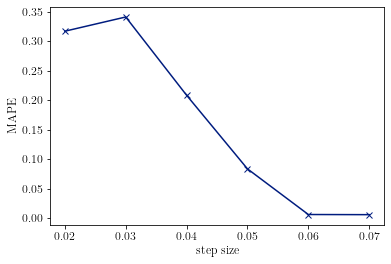

In [8]:
# plot 

plt.plot(range(len(results_grain_size)), list(results_grain_size.values()), '-x')
plt.xticks(range(len(results_grain_size)), list(results_grain_size.keys()))
plt.xlabel('step size')
plt.ylabel('MAPE')

## study r_max

In [10]:
path = '../../data/yukawa/k=10.0.txt'

# best found step size
step = 0.06

df = pd.read_csv(path, sep="\s+", names=["k", "q", "delta_0", "delta_1", "delta_2"])

results_rmax = {}
for r_max in [5, 6, 7, 8, 9, 10]:

    print('Computing', r_max)
    print()
    r = np.arange(0.1, r_max + step, step) # include r_max

    X_train, X_val, y_train, y_val = make_data(df, r)

    # load model
    model, _ = cnn(input_shape=(X_train.shape[1], 1))

    # fit model
    history = model.fit(
        X_train,
        y_train,
        batch_size=32,
        epochs=100,
        validation_data=(X_val, y_val),
        verbose=2,
        )

    predictions = np.array([p[0] for p in model.predict(X_val)]).flatten()

    results_rmax[str(r_max)] = mean_absolute_percentage_error(y_val, predictions)


oss: 1.1079e-06 - val_loss: 1.4266e-06
Epoch 83/100
22/22 - 0s - loss: 1.3679e-06 - val_loss: 1.0316e-06
Epoch 84/100
22/22 - 0s - loss: 1.3431e-06 - val_loss: 1.4158e-06
Epoch 85/100
22/22 - 0s - loss: 1.3812e-06 - val_loss: 1.1340e-06
Epoch 86/100
22/22 - 0s - loss: 1.4033e-06 - val_loss: 9.8127e-07
Epoch 87/100
22/22 - 0s - loss: 2.0182e-06 - val_loss: 1.1337e-06
Epoch 88/100
22/22 - 0s - loss: 1.3460e-06 - val_loss: 9.5298e-07
Epoch 89/100
22/22 - 0s - loss: 9.0906e-07 - val_loss: 2.2847e-06
Epoch 90/100
22/22 - 0s - loss: 2.4469e-06 - val_loss: 1.2357e-06
Epoch 91/100
22/22 - 0s - loss: 2.5216e-06 - val_loss: 2.1208e-06
Epoch 92/100
22/22 - 0s - loss: 1.5724e-06 - val_loss: 2.0065e-06
Epoch 93/100
22/22 - 0s - loss: 2.3180e-06 - val_loss: 1.4558e-06
Epoch 94/100
22/22 - 0s - loss: 4.1022e-06 - val_loss: 1.4053e-06
Epoch 95/100
22/22 - 0s - loss: 1.1269e-05 - val_loss: 3.9380e-06
Epoch 96/100
22/22 - 0s - loss: 5.9441e-06 - val_loss: 3.5086e-06
Epoch 97/100
22/22 - 0s - loss: 7.871

In [16]:
import json

with open('results_rmax.pkl', 'wb') as f:
    pickle.dump(results_rmax, f, pickle.HIGHEST_PROTOCOL)

# with open('results_rmax.pkl', 'rb') as f:
#     results_rmax = pickle.load(f)


Text(0, 0.5, 'MAPE')

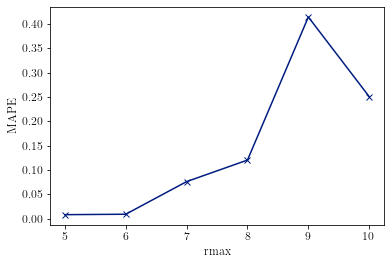

In [11]:
# plot 

plt.plot(range(len(results_rmax)), list(results_rmax.values()), 'x-')
plt.xticks(range(len(results_rmax)), list(results_rmax.keys()))
plt.xlabel('rmax')
plt.ylabel('MAPE')

## study r_0

In [12]:
%%time

step = 0.06
rmax = 6

results_rmin = {}
for r_0 in [0.001, 0.005, 0.01, 0.015, 0.02, 0.03,
       0.04, 0.05, 0.1]:

    print('Computing', r_0)
    print()
    r = np.arange(r_0, rmax + step, step) # include r_max

    X_train, X_val, y_train, y_val = make_data(df, r)

    # load model
    model, _ = cnn(input_shape=(X_train.shape[1], 1))

    # fit model
    history = model.fit(
        X_train,
        y_train,
        batch_size=32,
        epochs=100,
        validation_data=(X_val, y_val),
        verbose=2,
        )

    predictions = np.array([p[0] for p in model.predict(X_val)]).flatten()

    results_rmin[str(r_0)] = mean_absolute_percentage_error(y_val, predictions)




Epoch 99/100
22/22 - 0s - loss: 6.5877e-09 - val_loss: 3.5028e-09
Epoch 100/100
22/22 - 0s - loss: 3.2586e-09 - val_loss: 3.5245e-09
Computing 0.04

Epoch 1/100
22/22 - 1s - loss: 0.0832 - val_loss: 0.0032
Epoch 2/100
22/22 - 0s - loss: 0.0034 - val_loss: 0.0010
Epoch 3/100
22/22 - 0s - loss: 2.3529e-04 - val_loss: 9.4252e-05
Epoch 4/100
22/22 - 0s - loss: 2.9891e-05 - val_loss: 9.2879e-06
Epoch 5/100
22/22 - 0s - loss: 6.9291e-06 - val_loss: 5.7449e-06
Epoch 6/100
22/22 - 0s - loss: 3.9053e-06 - val_loss: 3.1784e-06
Epoch 7/100
22/22 - 0s - loss: 2.5726e-06 - val_loss: 2.3921e-06
Epoch 8/100
22/22 - 0s - loss: 1.9001e-06 - val_loss: 1.8433e-06
Epoch 9/100
22/22 - 0s - loss: 1.5267e-06 - val_loss: 1.7174e-06
Epoch 10/100
22/22 - 0s - loss: 1.1829e-06 - val_loss: 1.3244e-06
Epoch 11/100
22/22 - 0s - loss: 9.2905e-07 - val_loss: 1.2703e-06
Epoch 12/100
22/22 - 0s - loss: 7.8463e-07 - val_loss: 8.6685e-07
Epoch 13/100
22/22 - 0s - loss: 7.0770e-07 - val_loss: 6.6385e-07
Epoch 14/100
22/2

In [21]:
import json

with open('results_rmin.pkl', 'wb') as f:
    pickle.dump(results_rmin, f, pickle.HIGHEST_PROTOCOL)

# with open('results_rmin.pkl', 'rb') as f:
#     results_rmin = pickle.load(f)


Text(0, 0.5, 'MAPE')

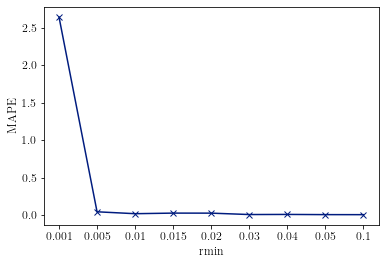

In [13]:
# plot 

plt.plot(range(len(results_rmin)), list(results_rmin.values()), 'x-')
plt.xticks(range(len(results_rmin)), list(results_rmin.keys()))
plt.xlabel('rmin')
plt.ylabel('MAPE')